<a href="https://colab.research.google.com/github/binaria010/Mate2B/blob/main/Segunda%20Parte/PCA%26Clustering/Clase_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering

1. Kmeans

2. DBSCAN



---



## Kmeans:
Es un método de agrupamiento de datos por características similares.
Dado un conjunto de puntos y una cantidad de clases $k$ (los clusters) el algoritmo de kmeans agrupa los datos en dichas clases, poniendo un punto $x$ del conjunto en la clases $C_i$ donde el indice $i$ satisface que:

$$
i = \arg\min_{j=1,\dots k} ||x - b_j||^2
$$

y $b_j$ es el baricentro (centroide) de la clase $C_j$ con $j=1,..., k$

es decir, ubica a $x$ en la clase cuyo baricentro es el mas cercano a $x$ de entre todos los baricentros.

Como ejemplo, fabriquemos datos artificiales donde ya sabemos como esta agrupados de verdad

In [1]:
import numpy as np
from numpy import savetxt
from sklearn.datasets import make_blobs, make_moons   # para generar datos artificiales
from sklearn.cluster import KMeans, DBSCAN        # la funcion KMeans implementa el algoritmo kmeans sonbre los datos
import matplotlib.pyplot as plt

import pandas as pd  


In [2]:
def Clasificador(S, B):
  
  clases = []#[[] for i in range(len(B))]

  for x in S:
    i = np.argmin([np.linalg.norm(x - B[j]) for j in range(len(B))])
    clases.append(i)   

  return clases  # lista con numeros 0,1,2,3,...k donde C[i] = j significa que el elemento i-esimo de S pertenece a clase j

def centroid(c):

  # c es una clase, dada en forma de matriz con l(c) filas (cantidad de elemntos en la clase) y dos columnas (nuestros datos viven en R^2)
  return np.mean(c, axis = 0)   

def my_kmeans(S, k):

  N = S.shape[0]  #cantidad de datos [-9.91771245 -0.06240664]

  indices = np.random.choice(N, size = k,  replace = False)
  B = S[indices]   # los baricentros: cada fila es uno de ellos

  clases = Clasificador(S, B)   # lista con numeros 0,1,2,3,...k donde C[i] = j significa que el elemento i-esimo de S pertenece a clase j
  C = [[S[l,:] for l in range(N) if clases[l] == i] for i in range(k)]   # crea la lista de clases

  Bprime = np.zeros(B.shape)
  i = 0
  
  while not (B == Bprime).all():

    B = Bprime


    for j in range(k):
      
      Bprime[j,:] = centroid(C[j]) 

    
    clases = Clasificador(S, Bprime)
    #C = [[S[l,:] for l in range(N) if clases[l] == i] for i in range(k)] 
    i = i +1  #cuento los pasos
    

  return clases, B


Genero datos en forma aleatoria usando la funcion ```make_blobs``` de ```sklearn.datasets```

In [ ]:
datos, true_labels = make_blobs(n_samples=100, centers=2, cluster_std=2.75, random_state= 42)

In [ ]:
datos.shape

(100, 2)

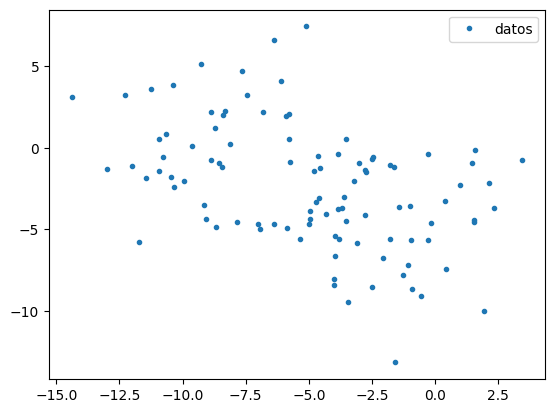

In [ ]:
plt.plot(datos[:, 0], datos[:, 1], ".",label = "datos")
plt.legend()
plt.show()

### Usando mi funcion de kmeans:

In [ ]:
k =2
clases, B = my_kmeans(datos, k)

In [ ]:
print(clases)

[0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]


In [ ]:
print("Los centroides de cada clase obtenidos usando my_kmeans es: ", B)

Los centroides de cada clase obtenidos usando my_kmeans es:  [[-2.76554994 -3.39281366]
 [-9.91771245 -0.06240664]]


Usando KMeans de sklearn.cluster:

Para esto primero definimos la variable (en realidad es un objeto de python) **kmeans** que es donde seteamos los parametros del algoritmo. (La variable se puede llamar como sea, kmeans en nuestro caso, pero puede tener otro nombre)

kmeans = KMeans(n_init, n_clusters) : le indicamos a la rutina de KMeans cuantas inicializaciones hace (para de la aleatorizacion del algoritmo) y cuantos clusters (grupos) queremos.

Despues, para obtener las clases (las etiquetas de cada punto del conjunto de datos), sobre la variable kmeans le aplicamos el atributo ```.fit_predict(datos)``` esto nos va a devolver una lista con dichas etiquetas

clasesKMeans = kmeans.fit_predict(datos) 


In [ ]:
S = datos
k =2
kmeans = KMeans(n_init = 10, n_clusters = k)   #el n_init es la cantidad de inicializaciones

clasesKMeans = kmeans.fit_predict(S)

print(clasesKMeans) #clase para cada dato

[1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1
 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 0
 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1]


¿Como se interpreta la salida clasesKMeans ?
Por ejemplo 

* clasesKmeans[0] = 0 quiere decir el elemento  S[0] (el primer elemento del conjunto de datos) está en la clase 0.

* clasesKmeans[2] = 1 quiere decir el elemento  S[2] (el tercer elemento del conjunto de datos) está en la clase 1. y así sucesivamente


¿Como obtener los centroides de cada clase?

los centroides los hallamos aplicando el método ```.cluster_centers``` a la variable kmeans y el resultado lo podemmos guardar en una variable llamada centroides:

centroides = kmeans.cluser_centers_



In [ ]:
centroides = kmeans.cluster_centers_

print("Los centroides obtenidos usando la rutia de sklearn son:", centroides)

Los centroides obtenidos usando la rutia de sklearn son: [[-9.10313471  0.57127978]
 [-2.34835702 -4.23473213]]


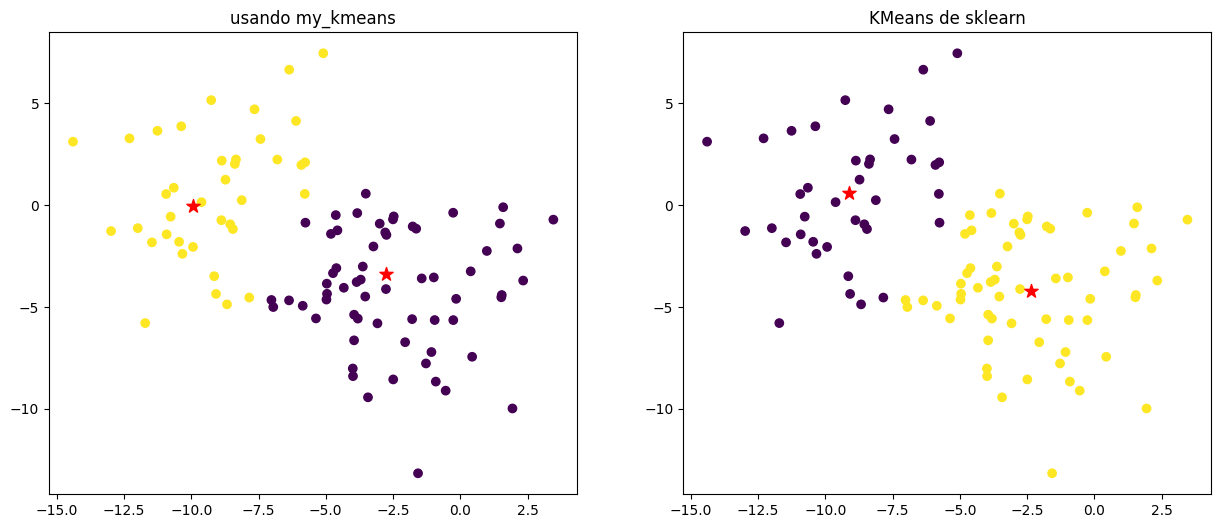

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.scatter(S[:, 0], S[:, 1], c = clases)  # La ultima opción asigna el color de 
#cada punto con los colores que elige Python
plt.scatter(B[: ,0], B[:, 1], marker='*', s=100, c='red')  # graficos los centroides
plt.title("usando my_kmeans")

plt.subplot(122)
plt.scatter(S[:, 0], S[:, 1], c = clasesKMeans) 
# graficos los centroides
plt.scatter(centroides[:,0], centroides[:,1], marker='*', s=100, c='red')
plt.title("KMeans de sklearn")

plt.show()

PAra calcular el valor de WCSS obtenido, le aplicamos a kmeans el atributo ```inertia_```

WCSS = kmeans.inertia_

In [ ]:
WCSS = kmeans.inertia_

print("El valor de la funcion de costo es: ", WCSS)

El valor de la funcion de costo es:  1440.090686639924


#  Ejemplo 2

usemos los datos del archivo dataEjemplo2.csv. Para  distintos valores de k aplicamos el algoritmo y  calculemos la función WCSS (whithin cluster sum of squares)

Subimos el archivo con pandas y lo convertivmos a numpy array

In [ ]:
### para esconder
data2, true_labels = make_blobs(n_samples=100, centers=3, cluster_std=1.75, random_state=42)

savetxt("dataEjemplo2.csv", data2, header = "x,y", delimiter=",", comments="")

In [ ]:
data2 = pd.read_csv("/content/dataEjemplo2.csv", header = 0)

data2.head(10)

,x,y
0,-8.361516,-9.531092
1,6.063534,-0.180843
2,-3.330778,9.963766
3,7.094769,-0.480070
4,-6.253499,-5.898737
5,2.906440,0.982149
6,-1.929487,10.721490
7,4.255453,2.598117
8,4.809765,3.668298
9,-4.523436,9.671758


Realicemos un plot primero para tener una idea:

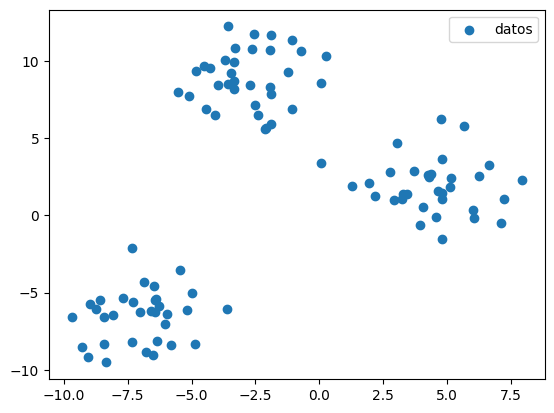

In [ ]:
plt.scatter(data2['x'], data2['y'], label = "datos")
plt.legend()
plt.show()

Para $k=2,3,4,5$ calculemos los clusters y sus WCSS rescpectivos y nos quedamos con el que de menor. Hacemos gráficos en cada caso

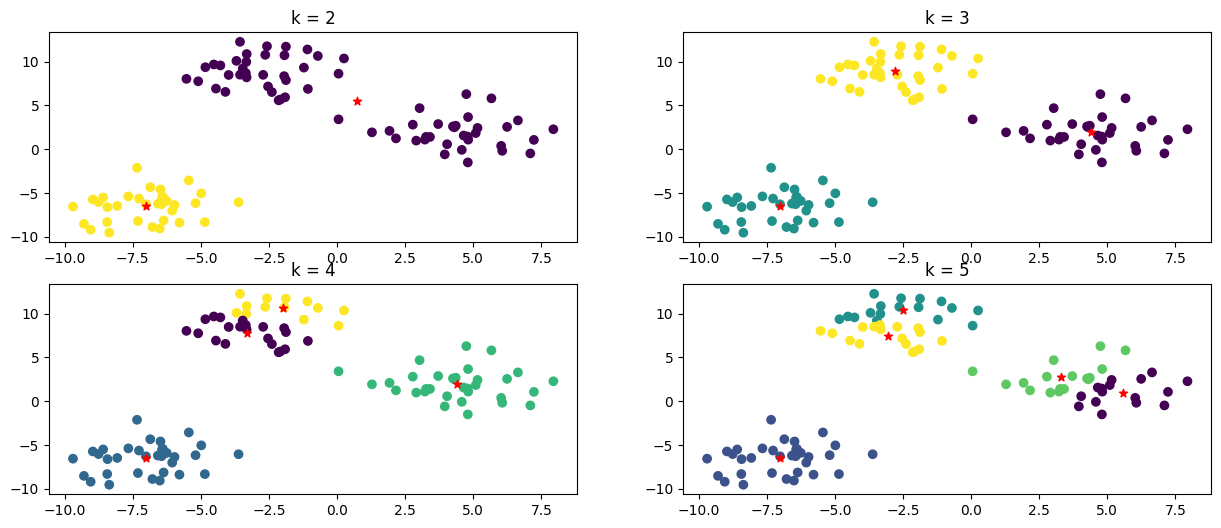

In [ ]:
WCSS = np.zeros(4)  # en este vector guardamos los valores de WCSS

plt.figure(figsize = (15, 6))
for k in range(2,6):

  kmeans = KMeans(n_init = 10, n_clusters = k, random_state= 82)   #el n_init es la cantidad de inicializaciones
  clasesKMeans = kmeans.fit_predict(data2)
  centroides = kmeans.cluster_centers_   #cada fila son las coord de un centroide
  WCSS[k-2] = kmeans.inertia_

  plt.subplot(2,2,k-1)
  plt.scatter(data2["x"], data2["y"], marker = "o", c = clasesKMeans)
  plt.scatter(centroides[:, 0], centroides[:, 1], marker = "*", color = "red")
  plt.title("k = "+ str(k))

plt.show()

In [ ]:
WCSS

array([2202.0896088 ,  526.47739031,  446.32558933,  378.47826474])

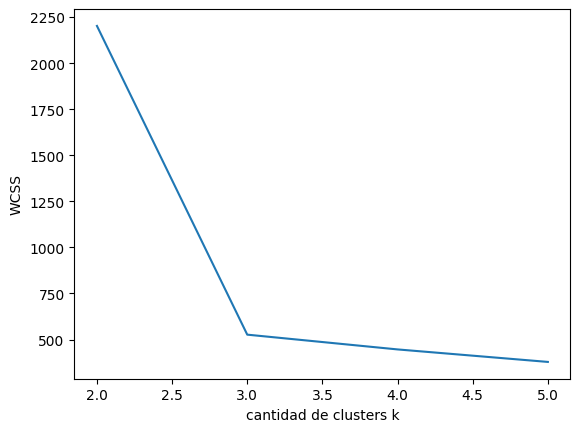

In [ ]:
plt.plot(range(2, 6), WCSS)
plt.xlabel("cantidad de clusters k")
plt.ylabel("WCSS")
plt.show()



---



---



---



# DBSCAN:

Arma clusters en regiones densas de puntos, separados por
regiones poco densas.

Es útil cuando los clusters tienen formas irregulares, o hay
ruido (outliers) en los datos.

La cantidad de clases las determina el algoritmo.

La forma de agrupar no es de tipo “esférico”. Los clusters
pueden tener cualquier forma. Esto lo vamos a ver ilustrado en el ejemplo 4

## Ejemplo 3:

Para el conjunto de datos anterior dataEjemplo2 (datos generados artificialemtne) apliquemos el algoritmo DBSCAN de ```sklearn.cluster```



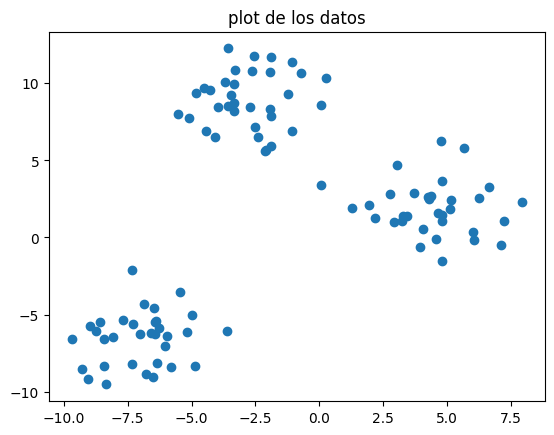

In [ ]:
plt.scatter(data2["x"], data2["y"])
plt.title("plot de los datos")
plt.show()

El algoritmo DBSCAN depende de dos inputs (parámetros elegidos por el usuario): 

* epsilon : radio del circulo (o esfera de agrupamiento)
* min_samples : la clantidad de vecinos de un punto dado que estan a distancia de como mucho epsilon para ser definido como un nucleo de  un cluster y no como outlier (observación atípica)

Para empezar, tomemos un valor especifico de epsilon y uno min_samples y despues variamos estos parametros para elegir la mejor opcion de entre ellos

Por defecto los valores estan seteados en eps = 0.5 y min_sample =5


Funciona en forma similar a KMeans:

* definimos el objeto que llamamos por ejemplo dbscan (puede tener cualquier nombre)

dbscan = DBSCAN(eps = epsilon, min_samples = n) con epsilon y n especificados

* sobre el objeto dbscan aplicamos el método ```fit_predict(datos)``` y esto nos develve una lista con etiquetas una para cada elemento del conjunto datos, esta lista la guardamos en una variable que llamamos clases_dbscan (se puede llamar como quieran)

clases_dbscan = dbscan.fit_predict(datos)

* Para obtener saber cuantas etiquetas (cantidad de grupos) hay, lo hacemos con el atributo ```labels_``` y eso lo guardamos en alguna variable, por ejemplo yo la llamé etiquetas:

etiquetas = dbscan.labels_   





In [ ]:
dbscan = DBSCAN(eps = 1, min_samples = 1)
clases_dbscan = dbscan.fit_predict(data2)

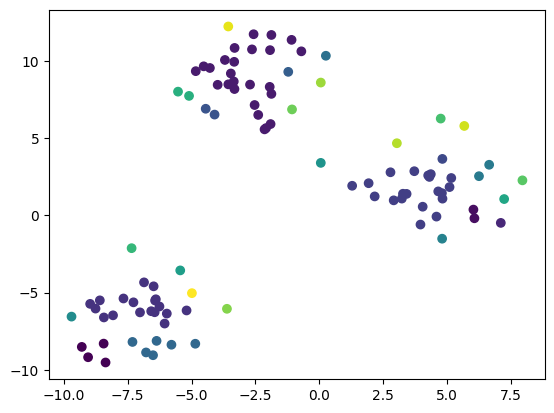

In [ ]:
plt.scatter(data2['x'], data2['y'], c = clases_dbscan)
plt.show()

Realicemos un DBSCAN para distintos valores de epsilon y dejemos fja la cantidad min_samples (cantidad de vecinos)


 ---------------------------------------------------------------
los clusters para epsilon = 0.5 son :
 [-1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


Cantidad de datos por cluster:
 (array([-1,  0]), array([95,  5]))

 


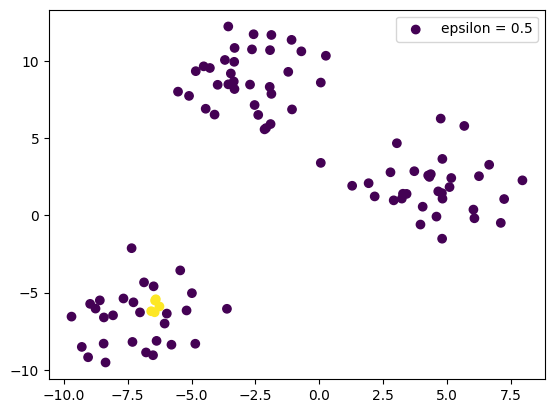


 ---------------------------------------------------------------
los clusters para epsilon = 1.0 son :
 [-1 -1  3 -1  0  1 -1  2 -1  3  3  0  0 -1 -1  4  0 -1  4  0  3  0  0 -1
 -1  3  1  6  4 -1  4  2  2 -1 -1  3  5  3 -1 -1 -1  3 -1  3  3  2 -1  0
 -1  1 -1  2 -1  0 -1  0  3  5 -1 -1  6  1  6 -1 -1  6 -1 -1  2  2  1  0
  4  5  2  0 -1  6 -1 -1 -1  1 -1 -1  5  5 -1 -1 -1 -1  2 -1 -1 -1 -1  3
 -1  2 -1  3]


Cantidad de datos por cluster:
 (array([-1,  0,  1,  2,  3,  4,  5,  6]), array([44, 12,  6, 10, 13,  5,  5,  5]))

 


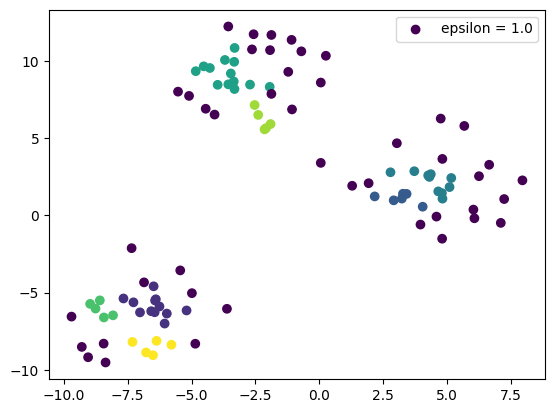


 ---------------------------------------------------------------
los clusters para epsilon = 1.5 son :
 [ 1  2  0  2  1  2  0  2  2  0  0  1  1 -1  0  1  1  0  1  1  0  1  1  0
  0  0  2  1  1  1  1  2  2  1  0  0  0  0  2  2  1  0  2  0  0  2  1  1
  1  2 -1  2  0  1  1  1  0  0  2  0  1  2  1  2 -1  1 -1  1  2  2  2  1
  1  0  2  1  2  1 -1  2  0  2  0 -1  0  0 -1 -1  0  2  2 -1 -1 -1  0  0
  0  2  1  0]


Cantidad de datos por cluster:
 (array([-1,  0,  1,  2]), array([11, 31, 31, 27]))

 


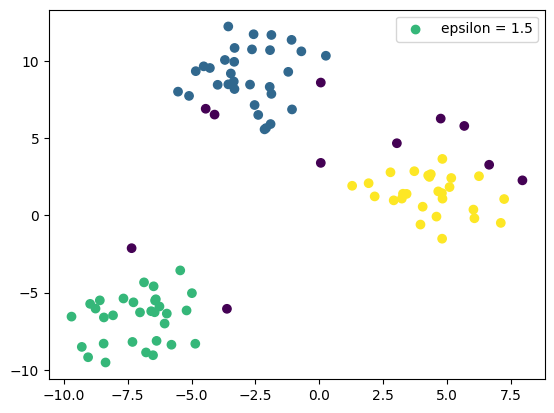


 ---------------------------------------------------------------
los clusters para epsilon = 2.0 son :
 [ 0  1  2  1  0  1  2  1  1  2  2  0  0  2  2  0  0  2  0  0  2  0  0  2
  2  2  1  0  0  0  0  1  1  0  2  2  2  2  1  1  0  2  1  2  2  1  0  0
  0  1  1  1  2  0  0  0  2  2  1  2  0  1  0  1 -1  0 -1  0  1  1  1  0
  0  2  1  0  1  0  1  1  2  1  2  0  2  2  2  1  2  1  1  1  2 -1  2  2
  2  1  0  2]


Cantidad de datos por cluster:
 (array([-1,  0,  1,  2]), array([ 3, 32, 31, 34]))

 


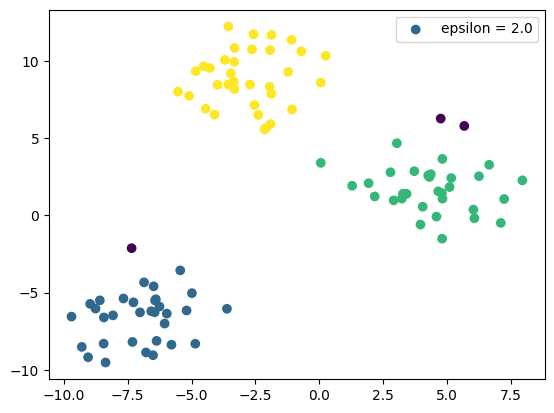


 ---------------------------------------------------------------
los clusters para epsilon = 2.5 son :
 [0 1 2 1 0 1 2 1 1 2 2 0 0 2 2 0 0 2 0 0 2 0 0 2 2 2 1 0 0 0 0 1 1 0 2 2 2
 2 1 1 0 2 1 2 2 1 0 0 0 1 1 1 2 0 0 0 2 2 1 2 0 1 0 1 0 0 1 0 1 1 1 0 0 2
 1 0 1 0 1 1 2 1 2 0 2 2 2 1 2 1 1 1 2 1 2 2 2 1 0 2]


Cantidad de datos por cluster:
 (array([0, 1, 2]), array([33, 33, 34]))

 


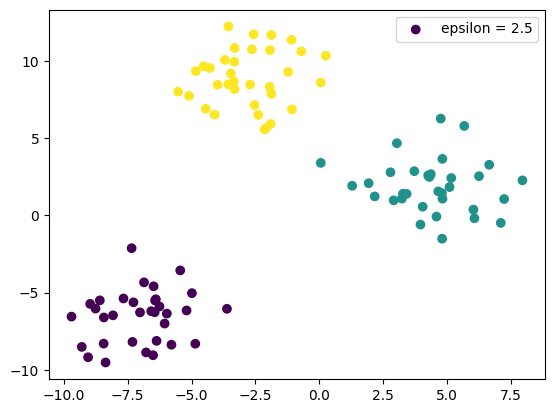


 ---------------------------------------------------------------
los clusters para epsilon = 3.0 son :
 [0 1 2 1 0 1 2 1 1 2 2 0 0 2 2 0 0 2 0 0 2 0 0 2 2 2 1 0 0 0 0 1 1 0 2 2 2
 2 1 1 0 2 1 2 2 1 0 0 0 1 1 1 2 0 0 0 2 2 1 2 0 1 0 1 0 0 1 0 1 1 1 0 0 2
 1 0 1 0 1 1 2 1 2 0 2 2 2 1 2 1 1 1 2 1 2 2 2 1 0 2]


Cantidad de datos por cluster:
 (array([0, 1, 2]), array([33, 33, 34]))

 


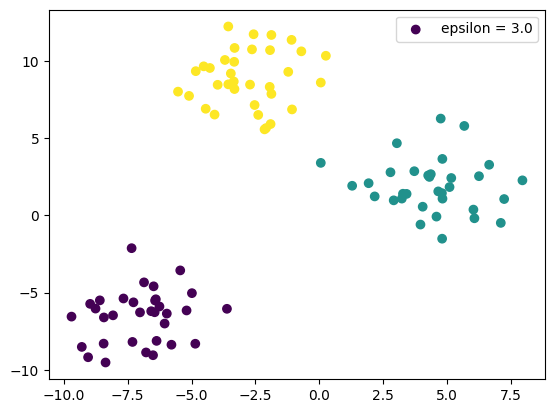

In [ ]:
epsilons = np.linspace(0.5, 3, 6)
cant_min_puntos = 5

for epsilon in epsilons:
  dbscan = DBSCAN(eps = epsilon, min_samples = cant_min_puntos)
  clases_dbscan = dbscan.fit_predict(data2) #la clase -1 son las observaciones consideradas ruido
  etiquetas = dbscan.labels_
  print("\n ---------------------------------------------------------------")
  print("los clusters para epsilon = " +str(epsilon) +" son :\n", etiquetas)
  print("\n")
  cantidades = np.unique(clases_dbscan, return_counts = True)
  print("Cantidad de datos por cluster:\n", cantidades)
  print("\n ")
  plt.scatter(data2["x"], data2["y"], c = clases_dbscan, label="epsilon = "+ str(epsilon))
  plt.legend()
  plt.show()

## Ejemplo 4:

Generamos otro conjunto de datos

In [ ]:
datos3, true_labels = make_moons(500, noise=0.1, random_state=42)  # esto genera datos artificialmente

savetxt("dataEjemplo4.csv", datos3, header = "x,y", delimiter=",", comments="")

In [ ]:
# leemos los datos del archivo dataEjemplo3.csv:

data3 = pd.read_csv("/content/dataEjemplo4.csv", header = 0)

data3.head(10)

,x,y
0,0.830676,-0.409936
1,0.798355,0.837612
2,1.050468,-0.485162
3,-0.258143,0.980008
4,0.330682,1.147633
5,1.266252,-0.496984
6,1.076166,-0.385878
7,0.056451,1.106044
8,0.587096,0.669692
9,1.760405,-0.206328


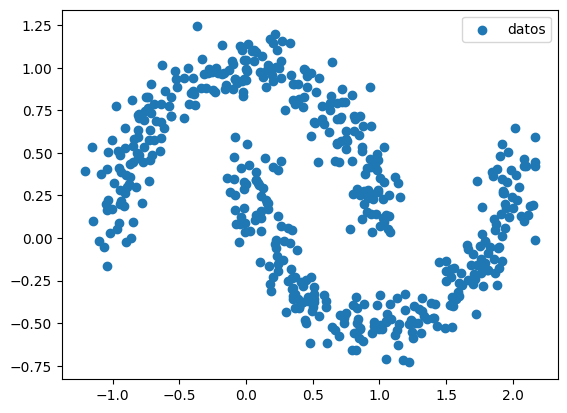

In [ ]:
plt.scatter(data3["x"], data3["y"], label = "datos")
plt.legend()
plt.show()

los clusters son :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

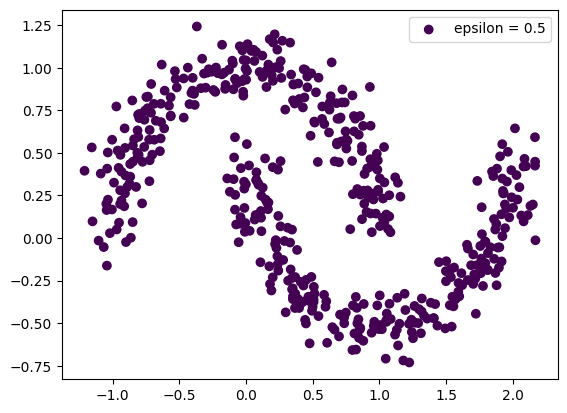

In [ ]:
dbscan = DBSCAN()  #si no agrego nada dejo que se usen los valores por defecto
clases_dbscan = dbscan.fit_predict(data3)
etiquetas = dbscan.labels_

print("los clusters son :\n", etiquetas)
print("\n")
cantidades = np.unique(clases_dbscan, return_counts = True)
print("Cantidad de datos por cluster:\n", cantidades)
print("\n ")
plt.scatter(data3["x"], data3["y"], c = clases_dbscan, label="epsilon = 0.5")
plt.legend()
plt.show()

No agrupó! Cambiemos el valor de epsilon.


 ---------------------------------------------------------------
los clusters para epsilon = 0.2 son :
 [0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1
 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0
 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0
 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1
 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0
 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0

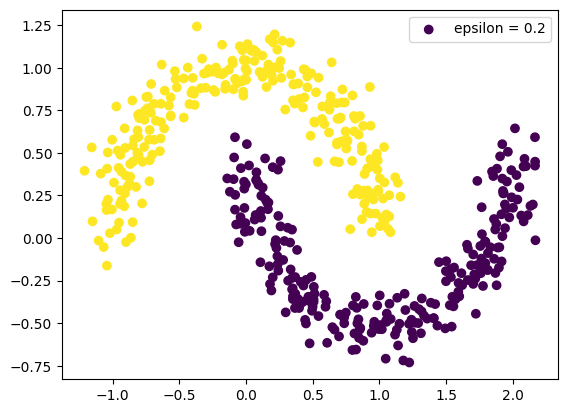


 ---------------------------------------------------------------
los clusters para epsilon = 0.4666666666666667 son :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

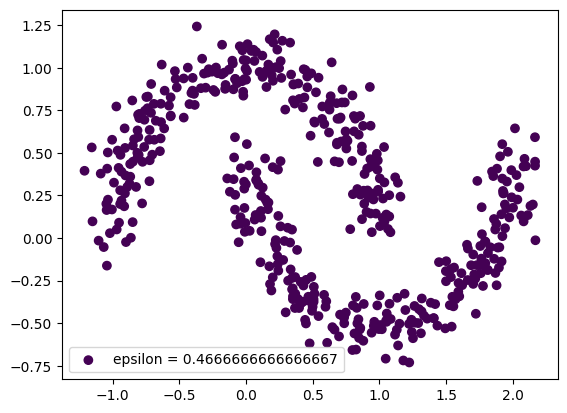


 ---------------------------------------------------------------
los clusters para epsilon = 0.7333333333333334 son :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

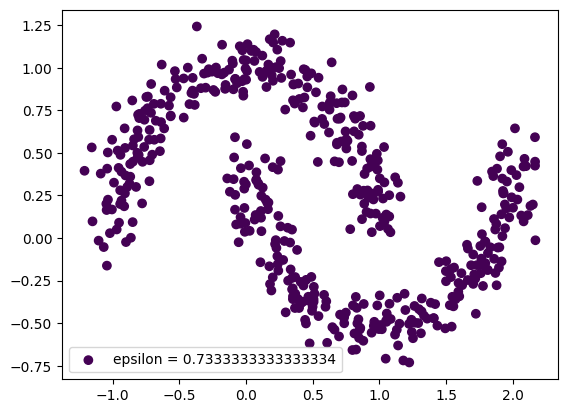


 ---------------------------------------------------------------
los clusters para epsilon = 1.0 son :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

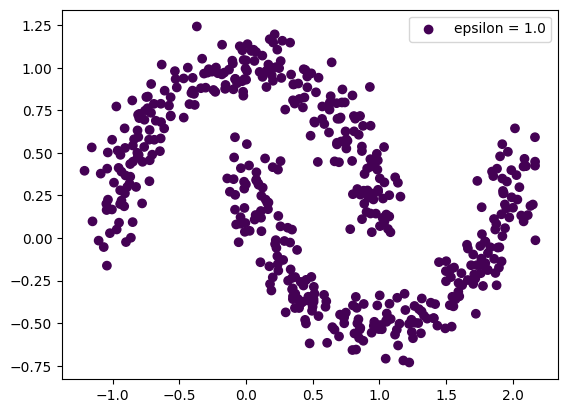

In [ ]:
epsilons = np.linspace(0.2, 1, 4)


for epsilon in epsilons:
  dbscan = DBSCAN(eps = epsilon)
  clases_dbscan = dbscan.fit_predict(data3) #la clase -1 son las observaciones consideradas ruido
  etiquetas = dbscan.labels_
  print("\n ---------------------------------------------------------------")
  print("los clusters para epsilon = " +str(epsilon) +" son :\n", etiquetas)
  print("\n")
  cantidades = np.unique(clases_dbscan, return_counts = True)
  print("Cantidad de datos por cluster:\n", cantidades)
  print("\n ")
  plt.scatter(data3["x"], data3["y"], c = clases_dbscan, label="epsilon = "+ str(epsilon))
  plt.legend()
  plt.show()

Veamos como queda la clasificación usando KMeans:

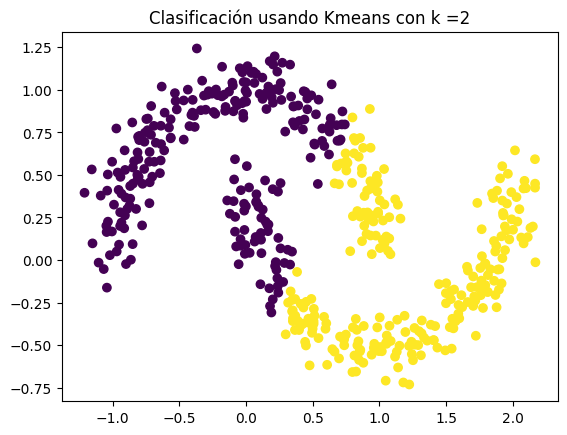

In [ ]:
kmeans = KMeans(n_clusters = 2, n_init = 10)
clases_kmeans = kmeans.fit_predict(data3)
etiquetas_kmeans = kmeans.labels_

plt.scatter(data3["x"], data3["y"], c = clases_kmeans)
plt.title("Clasificación usando Kmeans con k =2")
plt.show()

Como los datos fueron generados artificialmente, tenemos acceso a las etiquetas verdaderas y cuantos de ellos hay en cada uno.

true_labels es la variable en la que guardamos la info de las etiquetas

In [ ]:
np.unique(true_labels, return_counts= True)

(array([0, 1]), array([250, 250]))

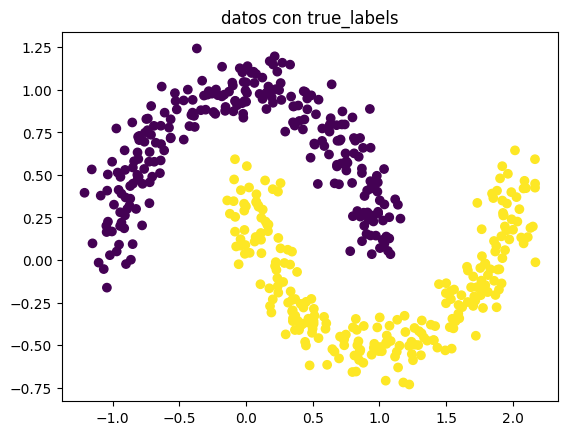

In [ ]:
# ploteemos los datos usando las etiquetas verdaderas con las que fueron armados:

plt.scatter(data3["x"], data3["y"], c = true_labels)
plt.title("datos con true_labels")
plt.show()



---



---

